# **Análisis Mensual**

En este proyecto se trabajarán las siguientes tareas:
- Resumen ejecutivo:
    - Ventas totales del mes.
    - % de crecimiento o disminución al mes anterior.
    - Producto estrella.
    - Día más fuerte.
    - Recomendación clave.
- Ventas:
    - Ingresos por día/semana.
    - Promedio de ticket por cliente.
    - Número de clientes atendidos.
    - Top 5 productos vendidos.
- Clientes y Consumo:
    - Horas pico de consumo.
    - Productos más comprados.

In [56]:
# Importando libreías
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Leyendo dataset
df = pd.read_excel('Data/Coffe_sales.xlsx')
df

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.70,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.90,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.70,Latte,Afternoon,Fri,Mar,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,10,card,ANON-0000-0000-1158,35.76,Cappuccino,Morning,Sun,Mar,7,3
3632,2025-03-23,2025-03-23 14:43:37.362,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3633,2025-03-23,2025-03-23 14:44:16.864,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3634,2025-03-23,2025-03-23 15:47:28.723,15,card,ANON-0000-0000-1316,25.96,Americano,Afternoon,Sun,Mar,7,3


## **Iniciando analisis**

In [23]:
df_LM = df[(df['date'].dt.year == 2025) & (df['date'].dt.month == 3)].copy()
df_LM

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
3317,2025-03-01,2025-03-01 10:31:45.742,10,card,ANON-0000-0000-1184,35.76,Cappuccino,Morning,Sat,Mar,6,3
3318,2025-03-01,2025-03-01 11:24:04.507,11,card,ANON-0000-0000-1190,25.96,Americano,Morning,Sat,Mar,6,3
3319,2025-03-01,2025-03-01 11:27:58.402,11,card,ANON-0000-0000-1198,25.96,Americano,Morning,Sat,Mar,6,3
3320,2025-03-01,2025-03-01 14:43:23.827,14,card,ANON-0000-0000-1254,35.76,Latte,Afternoon,Sat,Mar,6,3
3321,2025-03-01,2025-03-01 15:02:31.500,15,card,ANON-0000-0000-1152,25.96,Americano,Afternoon,Sat,Mar,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,10,card,ANON-0000-0000-1158,35.76,Cappuccino,Morning,Sun,Mar,7,3
3632,2025-03-23,2025-03-23 14:43:37.362,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3633,2025-03-23,2025-03-23 14:44:16.864,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3634,2025-03-23,2025-03-23 15:47:28.723,15,card,ANON-0000-0000-1316,25.96,Americano,Afternoon,Sun,Mar,7,3


## **Limpienado el dataset para el analisis**

Debido a que se tuvo que simplificar el dataset, resultado a que para el analisis solo se necesitaba el último mes, se realizarán ahora las siguientes tareas:
- Eliminar la columna 'Month_name' y 'Monthsort'.

In [24]:
# Eliminando columnas
df.drop(columns=['Month_name', 'Monthsort'], inplace=True)

In [25]:
df.columns

Index(['date', 'datetime', 'hour_of_day', 'cash_type', 'card', 'money',
       'coffee_name', 'Time_of_Day', 'Weekday', 'Weekdaysort'],
      dtype='object')

## **Resumen Ejecutivo**

### Ventas totales del mes

In [29]:
f"Se han vendido en total ${df_LM['money'].sum()} MXN"

'Se han vendido en total $9986.44 MXN'

### % de crecimiento/disminución respecto al mes pasado

In [32]:
# Creando el dataset del mes pasado
df_LM2 = df[(df['date'].dt.year == 2025) & (df['date'].dt.month == 2)].copy()

# Ventas del mes pasado
print(f"El mes anterior se vendieron en total ${df_LM2['money'].sum()} MXN")

# Haciendo el cálculo
f"El resultado fue de un: {round((df_LM['money'].sum() / df_LM2['money'].sum() - 1) * 100, 2)}%"

El mes anterior se vendieron en total $13215.48 MXN


'El resultado fue de un: -24.43%'

Como lo podemos apreciar en los cálculos, es último mes tuvo una caída de un 24.43% en las ventas, aunque quizas se debe a que todavía no concluye el mes de marzo.

### Producto estrella

In [41]:
df_LM.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

coffee_name
Americano              2647.92
Latte                  2038.32
Americano with Milk    1604.72
Cappuccino             1537.68
Cocoa                  1072.80
Hot Chocolate           822.48
Espresso                210.60
Cortado                  51.92
Name: money, dtype: float64

Podemos presenciar que el producto estrella es el Americano, debido a que sus ventas fueron mayores a las de los otros productos, ganandole al Latte por $600.00 MXN, sin embargo, sería interesante ver como han cambiado estos a lo largo del tiempo, para verificar si es el producto estrella del café, o simplemente es temporal.

### Día más fuerte

In [46]:
df_DF = df_LM.groupby(['date'])['money'].sum().sort_values(ascending=False).reset_index()
df_DF

,date,money
0,2025-03-03,737.72
1,2025-03-14,704.88
2,2025-03-21,636.80
3,2025-03-19,623.56
4,2025-03-20,597.60
5,2025-03-05,591.24
6,2025-03-07,554.02
7,2025-03-10,554.02
8,2025-03-18,549.12
9,2025-03-12,544.22


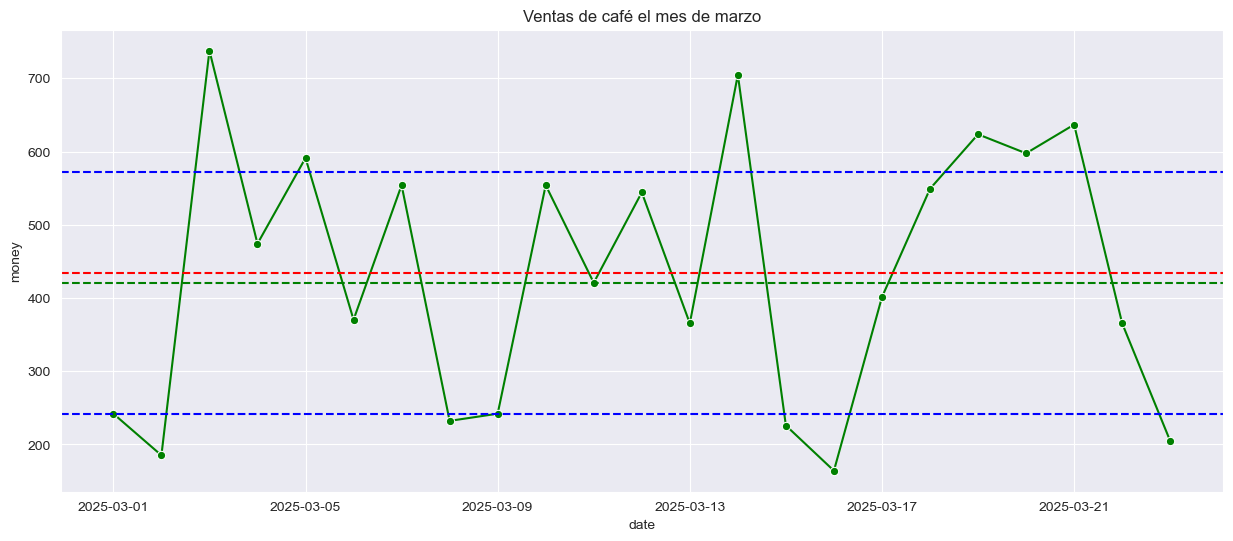

In [60]:
# Se realizará un gráfico para presenciar de una mejor manera el día más fuerte, debido a que la tabla no da mucha información, aunque si se logra er el día más fuerte
plt.figure(figsize = (15, 6))
plt.title("Ventas de café el mes de marzo")
sns.lineplot(data=df_DF, x='date', y='money', color='green', marker='o')
plt.axhline(np.quantile(df_DF['money'], 0.75), color='blue', linestyle='--')
plt.axhline(np.mean(df_DF['money']), color='red', linestyle='--')
plt.axhline(np.median(df_DF['money']), color='green', linestyle='--')
plt.axhline(np.quantile(df_DF['money'], 0.25), color='blue', linestyle='--')
plt.show()

Logrando analizar mejor los resultados presenciamos 2 fechas importantes. La segunda más importante es el 14 de marzo de 2025 debido a que se registro una venta total de `$704.88`, mientras que la fecha más importante fue el 03 de marzo de 2025 reportando una venta total de `$737.72`.

Sin embargo podemos presenciar algo bueno y malo a la vez, hasta 50% de las ventas fueron por debajo de la media, mientras que el 75% de las ventas fueron arriba de la media, esto indica que las ventas de la tienda a lo largo del mes fueron sólidas, sin embargo, esto también refleja que hay días muy malos o muy flojos, por lo tanto sería importante analizar que ha pasado en esos días.

### Recomendación

- La tienda tiene días muy sólidos de ventas, sin embargo, hay días extremadamente malos, esto podría explicar el gran bajo rendimiento que tuvo frente al mes pasado, por lo que recomiendo que se implementa una estrategia de ventas, ya sea a travez de una promoción o algo parecido, o tratar de aumentar las ventas de los productos menos vendidos, esto para aumentar esos bajos ingresos.

## **Ventas**

In [61]:
df_LM.columns

Index(['date', 'datetime', 'hour_of_day', 'cash_type', 'card', 'money',
       'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort',
       'Monthsort'],
      dtype='object')

### Ingresos por dia y semana

In [67]:
# Ingresos por día de la semana
df_DW = df_LM.groupby('Weekday')['money'].sum().sort_values(ascending=False).reset_index()

In [69]:
# Ordenando datos
weekday_orden = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convirtiendo a la columna 'Weekday' tipo categórico con el orden especifico
df_DW['Weekday'] = pd.Categorical(df_DW['Weekday'], categories=weekday_orden, ordered=True)

df_DW = df_DW.sort_values('Weekday')

In [70]:
df_DW

,Weekday,money
2,Mon,1692.92
3,Tue,1444.06
1,Wed,1759.02
4,Thu,1333.34
0,Fri,1895.70
5,Sat,1065.40
6,Sun,796.00


Los ingresos entre semana son estables, sin embargo, podemos apreciar una caída en las ventas en el fin de semana, lo cual es extraño, ya que al menos deberían de ser los días con ventas más fuertes, lo cual sería una cuestión a investigar.

### Ticket promedio

In [73]:
f"El ticket promedio por cliente es de: ${round(df_LM['money'].mean(), 2)} MXN"

'El ticket promedio por cliente es de: $31.31 MXN'

### Número de clientes atendidos

In [74]:
# Número único de clientes atendidos
df_LM['card'].nunique()

113

In [76]:
# Número de clientes totales atendidos
len(df_LM['card'])

319

Podemos que podemos ver 113 clientes únicos, y que algunos de ellos regresan a nuestro café, debido a que en total hemos atendido a 319 clientes, lo cual es algo muy bueno, ya que les gusta nuestros productos y regresan por más.